In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#Data
sizes = np.array([1000,1500,2200,2500,3000])
prices = np.array([200,300,400,500,600])

In [3]:
# Fit model: intialize linear regression
model = LinearRegression()      #create an instance of LR
model.fit(sizes.reshape(-1,1),prices)   #REshape 1-D array

LinearRegression()

In [4]:
print("Slope:",model.coef_[0])
print("Intercept:",model.intercept_)

Slope: 0.19747235387045808
Intercept: -2.84360189573448


In [5]:
#make a prediction with sq=1800
squarefeet = np.array([1800])

In [6]:
pred_price = model.predict(squarefeet.reshape(-1,1))
print("Predicted price with 1800 square feet is $",pred_price)

Predicted price with 1800 square feet is $ [352.60663507]


In [11]:
#make prediction for all input
pred_line = model.predict(sizes.reshape(-1,1))
print(pred_line)

[194.62875197 293.36492891 431.59557662 490.83728278 589.57345972]


In [12]:
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

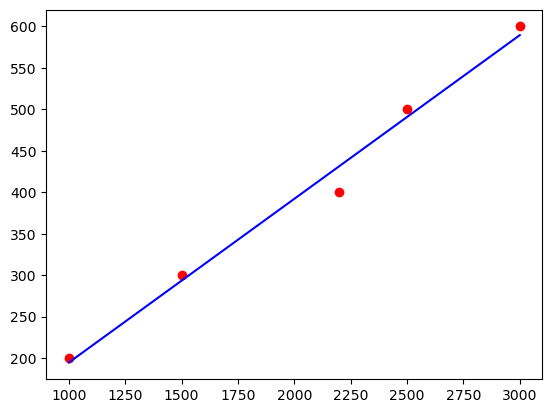

In [13]:
#Training Data
plt.scatter(sizes,prices, color='red', label='Data Points')
plt.plot(sizes, pred_line, color='blue', label='Regression Line')

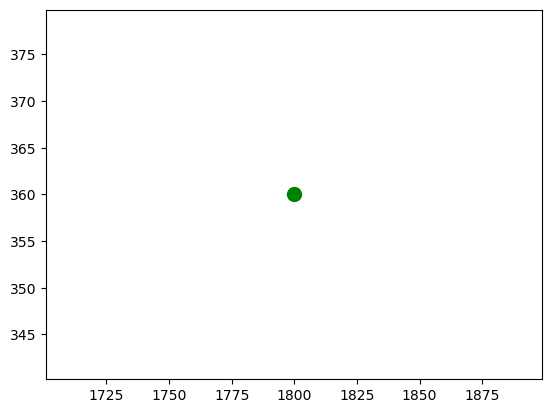

In [14]:
#data for making prediction
plt.scatter(1800,360, color='green', s=100 , label='Prediction:')

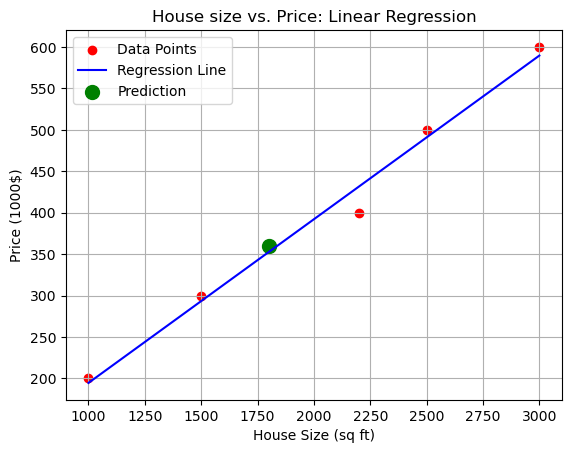

In [20]:
# 1. Plot the Training Data (Red dots)
plt.scatter(sizes, prices, color='red', label='Data Points')

# 2. Plot the Regression Line (Blue line)
plt.plot(sizes, pred_line, color='blue', label='Regression Line')

# 3. Plot the Prediction (Green dot)
plt.scatter(1800, 360, color='green', s=100, label='Prediction')

# 4. Add Labels and Title
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price (1000$)')
plt.title('House size vs. Price: Linear Regression')
plt.legend()
plt.grid(True)

# 5. Save and Show
plt.savefig('house_regression_plot.png')
plt.show()

Slope: 5.0
Intercept: 45.0


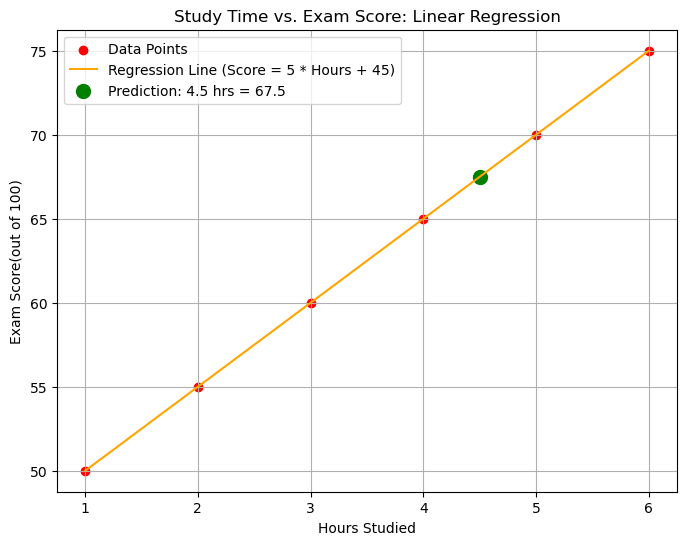

In [21]:
#Example #2: predict Exam score with study time 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# --- Data ---
hours = np.array([1, 2, 3, 4, 5, 6])
scores = np.array([50, 55, 60, 65, 70, 75])

# --- Fit Model ---
model = LinearRegression()
model.fit(hours.reshape(-1, 1), scores)

print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)

# --- Make Predictions ---
pred_line = model.predict(hours.reshape(-1, 1))

# --- Plotting ---
plt.figure(figsize=(8, 6))

# 1. Plot the actual data points
plt.scatter(hours, scores, color='red', label='Data Points')

# 2. Plot the regression line
plt.plot(hours, pred_line, color='orange', label='Regression Line (Score = 5 * Hours + 45)')

plt.scatter(4.5, 67.5, color='green', s=100, label='Prediction: 4.5 hrs = 67.5')

# 3. Final formatting (Labels and Legend)
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score(out of 100)')
plt.title('Study Time vs. Exam Score: Linear Regression')
plt.legend()
plt.grid(True)
plt.savefig('Study_regression_plot.png')#save for PPT
plt.show()

In [22]:
#Example #3: Predicting APPLE stock price

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error


In [23]:
# Simple version with minimal features
df = pd.read_csv('AAPL.csv')

In [24]:
# Create simple features
df['MA_3'] = df['Close'].rolling(window=3).mean()
df['MA_9'] = df['Close'].rolling(window=9).mean()
df = df.dropna()

In [25]:
# Simple feature set
X = df[['MA_3', 'MA_9']]
y = df['Close']

In [26]:
# Split data: 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [27]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

print("Coefficeints:", model.coef_)
print("Intercept:", model.intercept_)

Coefficeints: [ 1.19800871 -0.20812895]
Intercept: 1.2632252118350351


In [28]:
# Predict
y_pred = model.predict(X_test)

In [29]:
# Evaluate the error
mse = mean_squared_error(y_test, y_pred)
print("mean square error is: ", mse)

mean square error is:  18.063663611086596


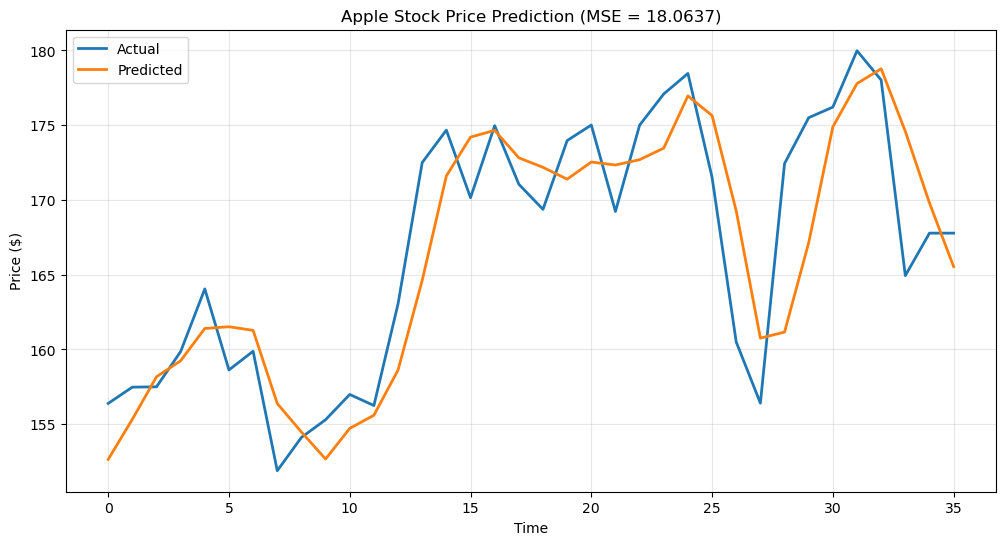

In [30]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(y_pred, label='Predicted', linewidth=2)
plt.title(f'Apple Stock Price Prediction (MSE = {mse:.4f})')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('APPL_price_line_plot.png')  # Save for PPT
plt.show()


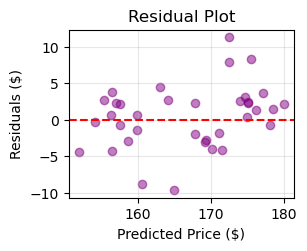

In [31]:
# Plot 3: Residuals
plt.subplot(2, 2, 3)
residuals = y_test - y_pred
plt.scatter(y_test, residuals, alpha=0.5, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Residuals ($)')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)
plt.savefig('APPL_price_residual_plot.png')  # Save for PPT
plt.show()